#Identification model



In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p
import numpy as np 
import pandas as pd 

In [ ]:
#df = pd.read_csv('/content/Primary_annotation10-3.csv')
#df1=pd.read_csv('/content/drive/MyDrive/323 final/1K_byme.csv')
df1=pd.read_csv('/content/drive/MyDrive/323 final/Vadar_1Mplus.csv')
df1=df1.head(n=1000)
#df1.shutonu.dropna()

df1=df1[['Datetime','Text','comp_score']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df1.count()

In [ ]:
df1=df1.dropna()

In [ ]:
train_df=df1

In [ ]:
train_df.count()

In [ ]:
train_df.comp_score.value_counts()

In [ ]:
train_df = train_df.dropna()
#train_df = train_df.drop_duplicates()

In [ ]:
train_df.count()

In [ ]:
train_df.head()

,Datetime,Text,comp_score
0,2016-08-24 01:37:58+00:00,Check out Unilever Fair & and Lovely Advanced ...,pos
1,2021-04-18 03:48:54+00:00,"If you continue through OP's thread, it is spe...",pos
2,2020-09-27 02:16:46+00:00,Never forget this: kneeling was the peaceful p...,pos
3,2021-03-16 03:23:47+00:00,I get pussy? Not a mysogynist? Not a cringe re...,neg
4,2021-05-15 12:58:04+00:00,Abhas ji. Israel is clearly the aggressor here...,pos


In [ ]:
train_df=train_df.reset_index()

#Preprocessing

Contraction Expansion

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 14.8 MB/s 
     |████████████████████████████████| 283 kB 63.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85452 sha256=32e5598001021a9940f00b72fb7f74ed85926741be0c8da7ce9447250d1be4c9
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions as c

In [ ]:
def contraction_expand_tweet(row):
    text = row['Text']
    text = c.fix(text)
    return text

In [ ]:
train_df['Text'] = train_df.apply(contraction_expand_tweet, axis=1)

Cleaning Link, emojis, and user id mentions

In [ ]:
def preprocess_tweet(row):
    text = row['Text']
    text = p.clean(text)
    return text

In [ ]:
train_df['Text'] = train_df.apply(preprocess_tweet, axis=1)

In [ ]:
train_df.head()

,Datetime,Text,comp_score
0,2016-08-24 01:37:58+00:00,Check out Unilever Fair & and Lovely Advanced ...,pos
1,2021-04-18 03:48:54+00:00,"If you continue through OP's thread, it is spe...",pos
2,2020-09-27 02:16:46+00:00,Never forget this: kneeling was the peaceful p...,pos
3,2021-03-16 03:23:47+00:00,I get pussy? Not a mysogynist? Not a cringe re...,neg
4,2021-05-15 12:58:04+00:00,Abhas ji. Israel is clearly the aggressor here...,pos


Clearing html marks (&amp)

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
def html_char_removal(row):
    text = row['Text']
    text = BeautifulSoup(text).get_text()

    return text

In [ ]:
train_df['Text'] = train_df.apply(html_char_removal, axis=1)

In [ ]:
train_df.head()

,Datetime,Text,comp_score
0,2016-08-24 01:37:58+00:00,Check out Unilever Fair & and Lovely Advanced ...,pos
1,2021-04-18 03:48:54+00:00,"If you continue through OP's thread, it is spe...",pos
2,2020-09-27 02:16:46+00:00,Never forget this: kneeling was the peaceful p...,pos
3,2021-03-16 03:23:47+00:00,I get pussy? Not a mysogynist? Not a cringe re...,neg
4,2021-05-15 12:58:04+00:00,Abhas ji. Israel is clearly the aggressor here...,pos


Extracting English Tweets

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 10.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bc40ea1a9806e0403d79f23db3e49d466e445466510c4df7014dc73d30980cc0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_lang(txt):
  try:
    return detect(txt)
  except:
    return np.nan

text="Bonsoir"
detect_lang(text)

#data["language"] = data.cleaned_text.apply(detect_lang)

'fr'

In [ ]:
train_df["text"]=train_df.Text.apply(detect_lang)

In [ ]:
new_data = train_df[train_df.text == "en"]
new_data.reset_index(inplace = True)


In [ ]:
train_df=new_data

In [ ]:
train_df.head()

,index,Datetime,Text,comp_score,text
0,0,2016-08-24 01:37:58+00:00,Check out Unilever Fair & and Lovely Advanced ...,pos,en
1,1,2021-04-18 03:48:54+00:00,"If you continue through OP's thread, it is spe...",pos,en
2,2,2020-09-27 02:16:46+00:00,Never forget this: kneeling was the peaceful p...,pos,en
3,3,2021-03-16 03:23:47+00:00,I get pussy? Not a mysogynist? Not a cringe re...,neg,en
4,4,2021-05-15 12:58:04+00:00,Abhas ji. Israel is clearly the aggressor here...,pos,en


stop ward removal

In [ ]:
!pip install gensim

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
def stopword_removal(row):
    text = row['Text']
    text = remove_stopwords(text)
    return text

In [ ]:
train_df['Text'] = train_df.apply(stopword_removal, axis=1)

Removing punctuation marks and lower casing

In [ ]:
train_df['Text'] = train_df['Text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('[\.\,\!\?\:\;\-\=]', ' ')

In [ ]:
train_df.head()

,index,Datetime,Text,comp_score,text
0,0,2016-08-24 01:37:58+00:00,check unilever fair lovely advanced multivitam...,pos,en
1,1,2021-04-18 03:48:54+00:00,if continue op s thread specifically reference...,pos,en
2,2,2020-09-27 02:16:46+00:00,never forget this kneeling peaceful protest yo...,pos,en
3,3,2021-03-16 03:23:47+00:00,i pussy not mysogynist not cringe red pill guy,neg,en
4,4,2021-05-15 12:58:04+00:00,abhas ji israel clearly aggressor here how dif...,pos,en


Tokeninzing

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
train_df['tokens'] = train_df['Text'].apply(tknzr.tokenize)

In [ ]:
train_df.head()

,index,Datetime,Text,comp_score,text,tokens
0,0,2016-08-24 01:37:58+00:00,check unilever fair lovely advanced multivitam...,pos,en,"[check, unilever, fair, lovely, advanced, mult..."
1,1,2021-04-18 03:48:54+00:00,if continue op s thread specifically reference...,pos,en,"[if, continue, op, s, thread, specifically, re..."
2,2,2020-09-27 02:16:46+00:00,never forget this kneeling peaceful protest yo...,pos,en,"[never, forget, this, kneeling, peaceful, prot..."
3,3,2021-03-16 03:23:47+00:00,i pussy not mysogynist not cringe red pill guy,neg,en,"[i, pussy, not, mysogynist, not, cringe, red, ..."
4,4,2021-05-15 12:58:04+00:00,abhas ji israel clearly aggressor here how dif...,pos,en,"[abhas, ji, israel, clearly, aggressor, here, ..."


In [ ]:
train_df=train_df.reset_index()

In [ ]:
train_df.to_csv('pre_primary_annotation2.csv')

Plotting class distribution

In [ ]:
import seaborn as sns
from matplotlib import rcParams


In [ ]:
f = sns.countplot(x='comp_score', data=train_df )
rcParams['figure.figsize'] = 41.7,57
f.set_title("Tweet Distribution")






In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
train_df['normalized_tweets'] = train_df['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
train_df.head()

,index,Datetime,Text,comp_score,text,tokens,normalized_tweets
0,0,2016-08-24 01:37:58+00:00,check unilever fair lovely advanced multivitam...,pos,en,"[check, unilever, fair, lovely, advanced, mult...","[check, unilev, fair, love, advanc, multivitam..."
1,1,2021-04-18 03:48:54+00:00,if continue op s thread specifically reference...,pos,en,"[if, continue, op, s, thread, specifically, re...","[if, continu, op, s, thread, specif, refer, re..."
2,2,2020-09-27 02:16:46+00:00,never forget this kneeling peaceful protest yo...,pos,en,"[never, forget, this, kneeling, peaceful, prot...","[never, forget, thi, kneel, peac, protest, you..."
3,3,2021-03-16 03:23:47+00:00,i pussy not mysogynist not cringe red pill guy,neg,en,"[i, pussy, not, mysogynist, not, cringe, red, ...","[i, pussi, not, mysogynist, not, cring, red, p..."
4,4,2021-05-15 12:58:04+00:00,abhas ji israel clearly aggressor here how dif...,pos,en,"[abhas, ji, israel, clearly, aggressor, here, ...","[abha, ji, israel, clearli, aggressor, here, h..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

Stemming

In [ ]:
normalized_tweets = train_df['normalized_tweets'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
normalized_tweets.head()

0    [check, unilev, fair, love, advanc, multivitam...
1    [if, continu, op, s, thread, specif, refer, re...
2    [never, forget, thi, kneel, peac, protest, you...
3    [i, pussi, not, mysogynist, not, cring, red, p...
4    [abha, ji, israel, clearli, aggressor, here, h...
Name: normalized_tweets, dtype: object

In [ ]:
train_df.to_csv('inspect.csv')

In [ ]:
print (train_df.index.normalized_tweets)

In [ ]:

for i in range(len(normalized_tweets)):
    
    normalized_tweets[i] = ' '.join(normalized_tweets[i])    
train_df['tidy_tweet'] = normalized_tweets
train_df.head(10)

,index,Datetime,Text,comp_score,text,tokens,normalized_tweets,tidy_tweet
0,0,2016-08-24 01:37:58+00:00,check unilever fair lovely advanced multivitam...,pos,en,"[check, unilever, fair, lovely, advanced, mult...","[check, unilev, fair, love, advanc, multivitam...",check unilev fair love advanc multivitamin fai...
1,1,2021-04-18 03:48:54+00:00,if continue op s thread specifically reference...,pos,en,"[if, continue, op, s, thread, specifically, re...","[if, continu, op, s, thread, specif, refer, re...",if continu op s thread specif refer remov anti...
2,2,2020-09-27 02:16:46+00:00,never forget this kneeling peaceful protest yo...,pos,en,"[never, forget, this, kneeling, peaceful, prot...","[never, forget, thi, kneel, peac, protest, you...",never forget thi kneel peac protest you told s...
3,3,2021-03-16 03:23:47+00:00,i pussy not mysogynist not cringe red pill guy,neg,en,"[i, pussy, not, mysogynist, not, cringe, red, ...","[i, pussi, not, mysogynist, not, cring, red, p...",i pussi not mysogynist not cring red pill guy
4,4,2021-05-15 12:58:04+00:00,abhas ji israel clearly aggressor here how dif...,pos,en,"[abhas, ji, israel, clearly, aggressor, here, ...","[abha, ji, israel, clearli, aggressor, here, h...",abha ji israel clearli aggressor here how diff...
5,5,2021-05-16 23:51:35+00:00,new india announces support palestinian commit...,pos,en,"[new, india, announces, support, palestinian, ...","[new, india, announc, support, palestinian, co...",new india announc support palestinian commit t...
6,6,2021-05-15 01:40:42+00:00,it time gazi strip israel,neg,en,"[it, time, gazi, strip, israel]","[it, time, gazi, strip, israel]",it time gazi strip israel
7,7,2021-05-03 04:06:02+00:00,way niggas fake,neg,en,"[way, niggas, fake]","[way, nigga, fake]",way nigga fake
8,8,2021-05-18 15:51:58+00:00,israel state palestine free,pos,en,"[israel, state, palestine, free]","[israel, state, palestin, free]",israel state palestin free
9,9,2021-04-29 00:24:39+00:00,niggas crazy,neg,en,"[niggas, crazy]","[nigga, crazi]",nigga crazi


# BAG OF WORDS


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_df.comp_score)
train_df['Target'] = le.transform(train_df.comp_score)

In [ ]:
train_df.head()

,level_0,index,Datetime,Text,comp_score,text,tokens,normalized_tweets,tidy_tweet,Target
0,0,0,2016-08-24 01:37:58+00:00,check unilever fair lovely advanced multivitam...,pos,en,"[check, unilever, fair, lovely, advanced, mult...","[check, unilev, fair, love, advanc, multivitam...",check unilev fair love advanc multivitamin fai...,1
1,1,1,2021-04-18 03:48:54+00:00,if continue op s thread specifically reference...,pos,en,"[if, continue, op, s, thread, specifically, re...","[if, continu, op, s, thread, specif, refer, re...",if continu op s thread specif refer remov anti...,1
2,2,2,2020-09-27 02:16:46+00:00,never forget this kneeling peaceful protest yo...,pos,en,"[never, forget, this, kneeling, peaceful, prot...","[never, forget, thi, kneel, peac, protest, you...",never forget thi kneel peac protest you told s...,1
3,3,3,2021-03-16 03:23:47+00:00,i pussy not mysogynist not cringe red pill guy,neg,en,"[i, pussy, not, mysogynist, not, cringe, red, ...","[i, pussi, not, mysogynist, not, cring, red, p...",i pussi not mysogynist not cring red pill guy,0
4,4,4,2021-05-15 12:58:04+00:00,abhas ji israel clearly aggressor here how dif...,pos,en,"[abhas, ji, israel, clearly, aggressor, here, ...","[abha, ji, israel, clearli, aggressor, here, h...",abha ji israel clearli aggressor here how diff...,1


In [ ]:
y=[0,1]
le.inverse_transform(y)

array(['neg', 'pos'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_df['tidy_tweet'])
bow.shape

(9900, 1000)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
from imblearn.over_sampling import ADASYN

#oversample = ADASYN()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, train_df['Target'], random_state=42, test_size=0.3)

In [ ]:
xtrain_bow,ytrain=oversample.fit_resample(xtrain_bow,ytrain)
xtest_bow,ytest=oversample.fit_resample(xtest_bow,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lreg = LogisticRegression(solver='liblinear') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
lreg.fit(xtrain_bow,ytrain).score(xtest_bow,ytest) # predicting on the validation set 



 


0.7787588294651867

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluation = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})


In [ ]:
precision_train=format(precision_score(ytrain, lreg.predict(xtrain_tfidf), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, lreg.predict(xtrain_tfidf), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, lreg.predict(xtrain_tfidf), average='macro'),'.3f')


precision_test=format(precision_score(ytest, lreg.predict(xtest_tfidf), average='macro'),'.3f')
recall_test=format(recall_score(ytest, lreg.predict(xtest_tfidf), average='macro'),'.3f')
f1_test=format(f1_score(ytest, lreg.predict(xtest_tfidf), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['logregression_tfidf',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,logregression_tfidf,0.892,0.892,0.892,0.794,0.794,0.794


In [ ]:
pred_lreg=lreg.predict_proba(xtest_tfidf)

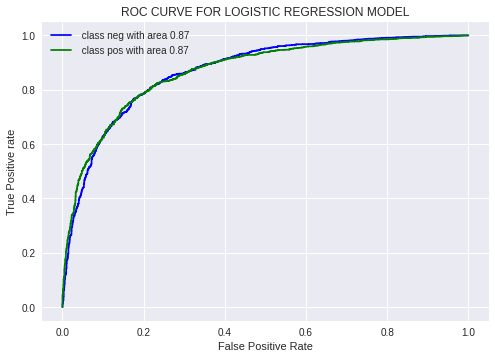

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2
y=[0,1]
color=['blue','green']
labels=le.inverse_transform(y)
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_lreg[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR LOGISTIC REGRESSION MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Lreg ROC',dpi=300); 

In [ ]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
Naive = MultinomialNB()
Naive.fit(xtrain_bow,ytrain).score(xtest_bow,ytest)

0.7230070635721494

In [ ]:
precision_train=format(precision_score(ytrain, Naive.predict(xtrain_tfidf), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, Naive.predict(xtrain_tfidf), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, Naive.predict(xtrain_tfidf), average='macro'),'.3f')


precision_test=format(precision_score(ytest, Naive.predict(xtest_tfidf), average='macro'),'.3f')
recall_test=format(recall_score(ytest,Naive.predict(xtest_tfidf), average='macro'),'.3f')
f1_test=format(f1_score(ytest, Naive.predict(xtest_tfidf), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[1] = ['Naive_tfidf',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,logregression_tfidf,0.892,0.892,0.892,0.794,0.794,0.794
1,Naive_tfidf,0.873,0.873,0.873,0.742,0.742,0.742


In [ ]:
pred_naive=Naive.predict_proba(xtest_tfidf)

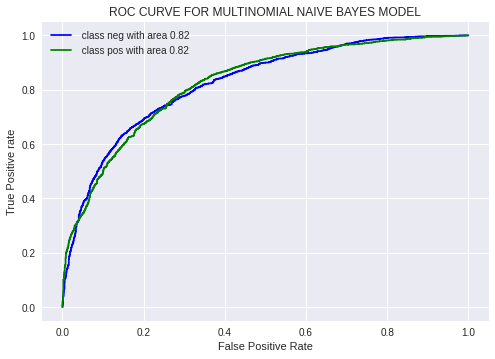

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2
y=[0,1]
color=['blue','green']
labels=le.inverse_transform(y)
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_naive[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR MULTINOMIAL NAIVE BAYES MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('NAIVE ROC',dpi=300); 

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
SVM.fit(xtrain_bow,ytrain).score(xtest_bow,ytest)

0.7694248234106963

In [ ]:
precision_train=format(precision_score(ytrain, SVM.predict(xtrain_tfidf), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, SVM.predict(xtrain_tfidf), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, SVM.predict(xtrain_tfidf), average='macro'),'.3f')


precision_test=format(precision_score(ytest, SVM.predict(xtest_tfidf), average='macro'),'.3f')
recall_test=format(recall_score(ytest,SVM.predict(xtest_tfidf), average='macro'),'.3f')
f1_test=format(f1_score(ytest, SVM.predict(xtest_tfidf), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['SVM_tfidf',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,logregression_tfidf,0.892,0.892,0.892,0.794,0.794,0.794
1,Naive_tfidf,0.873,0.873,0.873,0.742,0.742,0.742
2,SVM_tfidf,0.910,0.909,0.909,0.781,0.781,0.781


In [ ]:
pred_svm=SVM.predict_proba(xtest_tfidf)

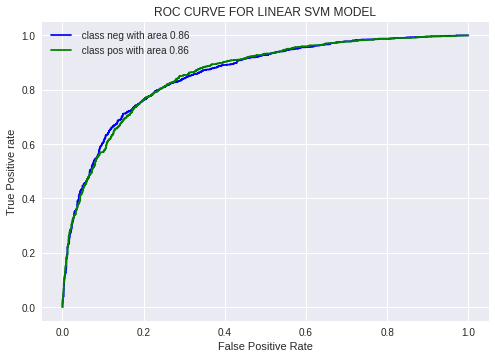

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2
y=[0,1]
color=['blue','green']
labels=le.inverse_transform(y)
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_svm[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR LINEAR SVM MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('SVM ROC',dpi=300); 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100,max_depth=50)
rf1.fit(xtrain_bow,ytrain).score(xtest_bow,ytest)

In [ ]:
precision_train=format(precision_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, rf1.predict(xtrain_tfidf), average='macro'),'.3f')


precision_test=format(precision_score(ytest, rf1.predict(xtest_tfidf), average='macro'),'.3f')
recall_test=format(recall_score(ytest,rf1.predict(xtest_tfidf), average='macro'),'.3f')
f1_test=format(f1_score(ytest, rf1.predict(xtest_tfidf), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['RF_TFIDF',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,logregression_tfidf,0.892,0.892,0.892,0.794,0.794,0.794
1,Naive_tfidf,0.873,0.873,0.873,0.742,0.742,0.742
2,SVM_tfidf,0.910,0.909,0.909,0.781,0.781,0.781
3,RF_TFIDF,0.943,0.937,0.937,0.813,0.809,0.808


In [ ]:
pred_rf=rf1.predict_proba(xtest_tfidf)

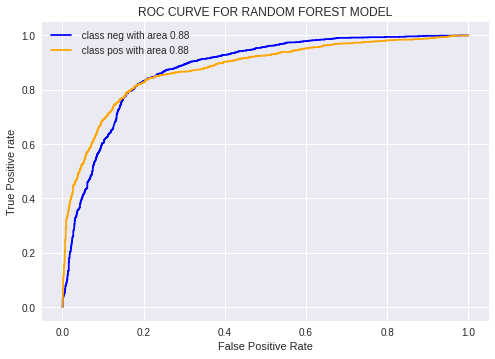

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2
y=[0,1]
color=['blue','orange']
labels=le.inverse_transform(y)
#format(a, '.2f')  

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_rf[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
plt.title('ROC CURVE FOR RANDOM FOREST MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('RF ROC',dpi=300); 

In [ ]:
clf_bag = BaggingClassifier(base_estimator=SVM)
clf_bag.fit(xtrain_bow,ytrain).score(xtest_bow,ytest)

0.5024509803921569

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
precision_train=format(precision_score(ytrain, lreg.predict(xtrain_bow), average='macro'),'.3f')
recall_train=format(recall_score(ytrain, lreg.predict(xtrain_bow), average='macro'),'.3f')
f1_train=format(f1_score(ytrain, lreg.predict(xtrain_bow), average='macro'),'.3f')


precision_test=format(precision_score(ytest, lreg.predict(xtest_bow), average='macro'),'.3f')
recall_test=format(recall_score(ytest, lreg.predict(xtest_bow), average='macro'),'.3f')
f1_test=format(f1_score(ytest, lreg.predict(xtest_bow), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['logregression',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

0.7606623181133969

In [ ]:
! pip install -q scikit-plot

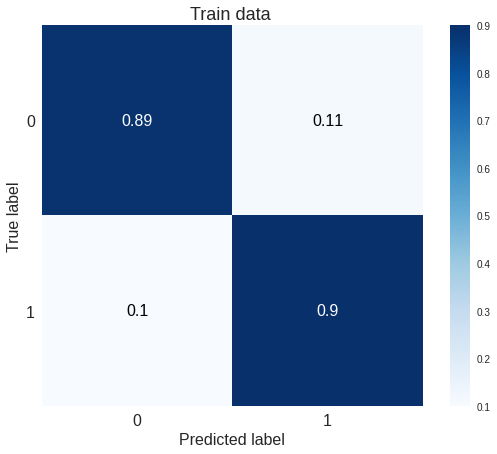

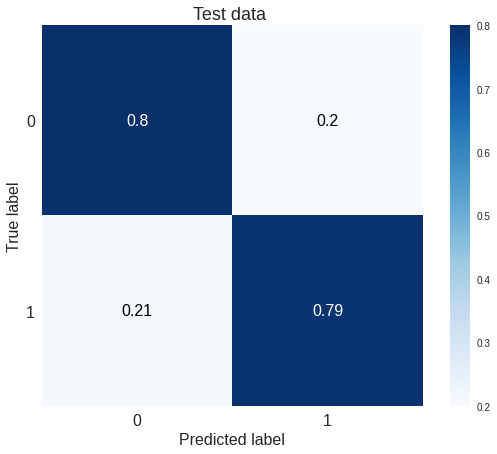

In [ ]:
import scikitplot as skplt 
ltrain=lreg.predict(xtrain_tfidf)
ltest=lreg.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('Lreg-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('Lreg-test',dpi=300);
 

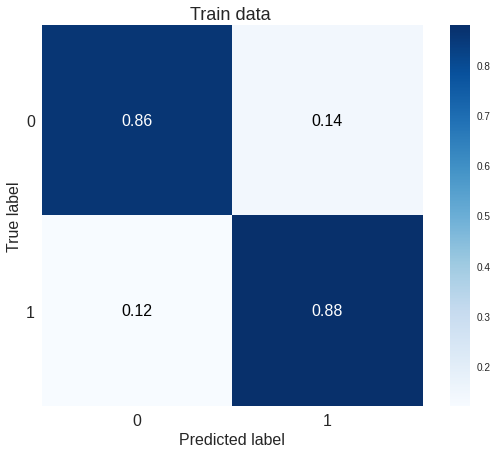

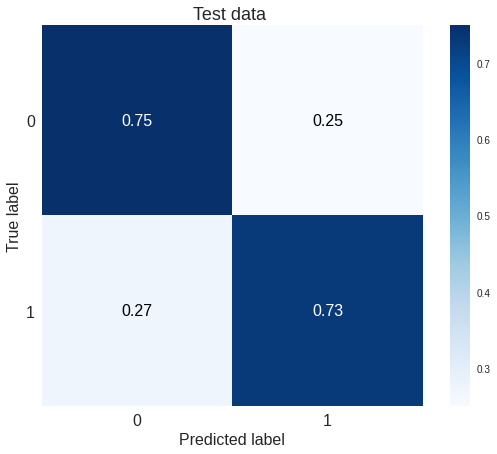

In [ ]:
import scikitplot as skplt 
ltrain=Naive.predict(xtrain_tfidf)
ltest=Naive.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('naive-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('naive-test',dpi=300);

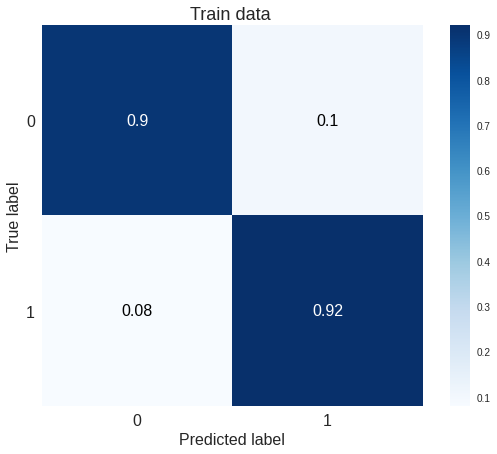

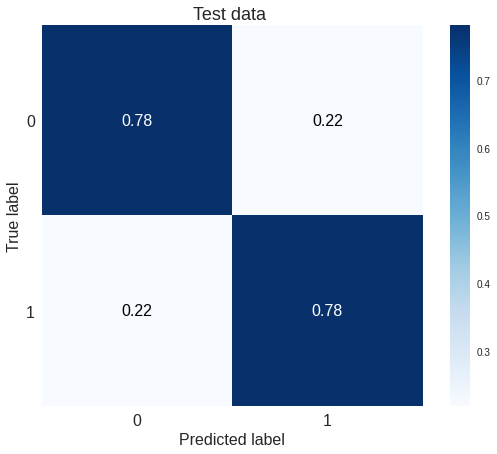

In [ ]:
import scikitplot as skplt 
ltrain=SVM.predict(xtrain_tfidf)
ltest=SVM.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('SVM-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('SVM-test',dpi=300);

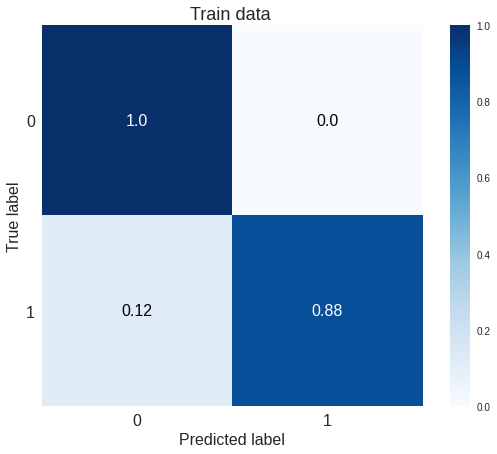

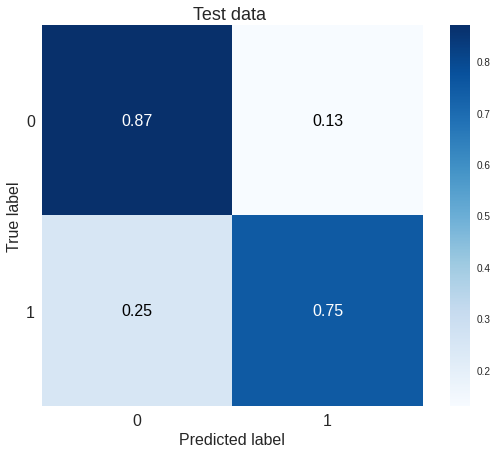

In [ ]:
import scikitplot as skplt 
ltrain=rf1.predict(xtrain_tfidf)
ltest=rf1.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('RF-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('RF-test',dpi=300);

# TFIDF transformation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(train_df.tidy_tweet).toarray()
labels = train_df.Target
features.shape

(9910, 3663)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
from imblearn.over_sampling import ADASYN

#oversample = ADASYN()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_df.comp_score)
train_df['Target'] = le.transform(train_df.comp_score)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(features, train_df['Target'], random_state=42, test_size=0.3)

In [ ]:
xtrain_tfidf,ytrain=oversample.fit_resample(xtrain_tfidf,ytrain)
xtest_tfidf,ytest=oversample.fit_resample(xtest_tfidf,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
Naive = MultinomialNB()
Naive.fit(xtrain_tfidf,ytrain).score(xtest_tfidf,ytest)

0.7421052631578947

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
SVM.fit(xtrain_tfidf,ytrain).score(xtest_tfidf,ytest)

0.781203007518797

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100,max_depth=50)
rf1.fit(xtrain_tfidf,ytrain).score(xtest_tfidf,ytest)

0.8087719298245614

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(solver='liblinear') 

# training the model 
lreg.fit(xtrain_tfidf,ytrain).score(xtest_tfidf,ytest)


0.793984962406015

In [ ]:
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(tfidf, train_df['Target'], random_state=42, test_size=0.3)